In [23]:
import random
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count

N = 20_000  # for bubble sort
# N = 2_000_000  # for merge and parallel merge

# dataset generation
# write random integers between 1 and 1 mil to a txt file

with open("dataset.txt", "w") as f:
    for _ in range(N):
        f.write(str(random.randint(1, 1000000)) + "\n")

print(f"dataset created with {N} integers.")


dataset created with 20000 integers.


In [24]:
# read helper function

def read_dataset(filename="dataset.txt"):
    with open(filename, "r") as f:
        return [int(line.strip()) for line in f]

dataset = read_dataset()
len(dataset), dataset[:10]  # print the last 10 integers in the dataset


(20000,
 [386202,
  672588,
  105653,
  615309,
  547786,
  582108,
  558523,
  896291,
  226666,
  10717])

In [25]:
# -------- bubble sort --------
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr


In [26]:
# -------- sequential merge sort --------
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result, i, j = [], 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


In [27]:
# -------- parallel merge sort --------
def parallel_merge_sort(arr):
    # split into chunks for each CPU core
    n_cores = cpu_count()
    size = len(arr) // n_cores
    chunks = [arr[i*size:(i+1)*size] for i in range(n_cores)]
    
    with Pool(processes=n_cores) as pool:
        sorted_chunks = pool.map(merge_sort, chunks)
    
    # Merge sorted chunks
    while len(sorted_chunks) > 1:
        new_chunks = []
        for i in range(0, len(sorted_chunks), 2):
            if i+1 < len(sorted_chunks):
                new_chunks.append(merge(sorted_chunks[i], sorted_chunks[i+1]))
            else:
                new_chunks.append(sorted_chunks[i])
        sorted_chunks = new_chunks
    return sorted_chunks[0]


In [28]:
results = {}

# Bubble Sort
data_copy = dataset.copy()
start = time.time()
bubble_sort(data_copy)
end = time.time()
results["Bubble Sort"] = end - start
print(f"Bubble Sort: {results['Bubble Sort']:.4f} sec")

# Merge Sort
data_copy = dataset.copy()
start = time.time()
merge_sort(data_copy)
end = time.time()
results["Merge Sort"] = end - start
print(f"Merge Sort: {results['Merge Sort']:.4f} sec")

# Parallel Merge Sort
data_copy = dataset.copy()
start = time.time()
parallel_merge_sort(data_copy)
end = time.time()
results["Parallel Merge Sort"] = end - start
print(f"Parallel Merge Sort: {results['Parallel Merge Sort']:.4f} sec")

results


Bubble Sort: 11.8752 sec
Merge Sort: 0.0277 sec
Parallel Merge Sort: 0.0823 sec


{'Bubble Sort': 11.875209093093872,
 'Merge Sort': 0.02769923210144043,
 'Parallel Merge Sort': 0.08234429359436035}

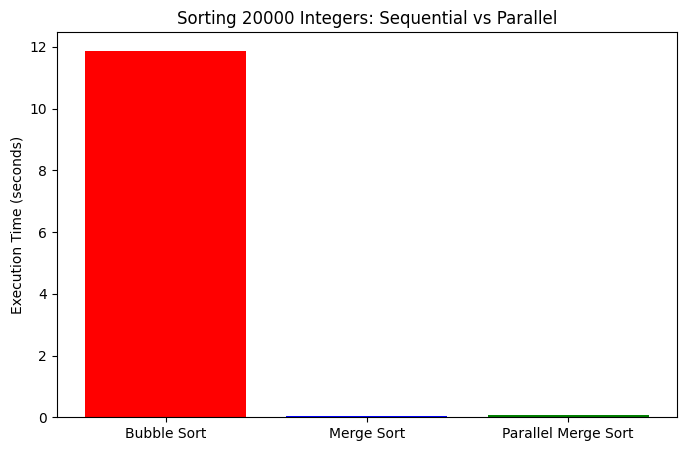

In [29]:
# Bar chart of execution times
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green'])
plt.ylabel("Execution Time (seconds)")
plt.title(f"Sorting {N} Integers: Sequential vs Parallel")
plt.show()


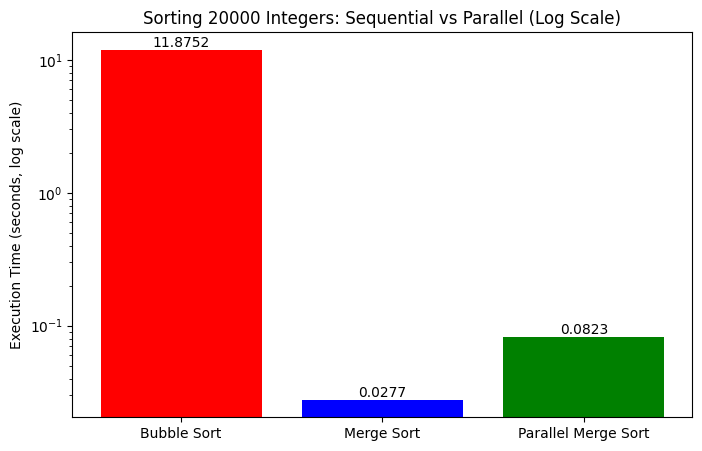

In [30]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green'])
plt.yscale("log")  # <-- Logarithmic scale
plt.ylabel("Execution Time (seconds, log scale)")
plt.title(f"Sorting {N} Integers: Sequential vs Parallel (Log Scale)")

# Annotate bars with actual values
for i, (algo, time_val) in enumerate(results.items()):
    plt.text(i, time_val, f"{time_val:.4f}", ha='center', va='bottom')

plt.show()